NLP - Review
What is NLP? Natural language processing is the converting human language into data which can then be used to make appropriate predictions to a novel input.

# Tokenization and Lemmatization

Separating the words from a sentence or the characters from a word (string) and giving them an integer value in order for it to be used later for statistical analysis (following vectorization) is *tokenization*.

*Lemmatization* is when you reduce words to their base form (i.e. Went -> go) to reduce size and improve accuracy.

Tokenization by Character or word (manual)

In [2]:
example = '24ResaP3xrisj98llhgwWig351qAZsxrdb22'
# iterate through about example string, making each character a 'token' in a new list

tokenlist = list(example)
print(len(tokenlist))
print(tokenlist)

36
['2', '4', 'R', 'e', 's', 'a', 'P', '3', 'x', 'r', 'i', 's', 'j', '9', '8', 'l', 'l', 'h', 'g', 'w', 'W', 'i', 'g', '3', '5', '1', 'q', 'A', 'Z', 's', 'x', 'r', 'd', 'b', '2', '2']


In [8]:
example_sentence = "Judy will buy a dog after she has bought a house."
#use the .split() method to get new token 'words' that are separated by whitespace
wordtokens = []
wordtokens = example_sentence.split(" ")
wordtokens


['Judy',
 'will',
 'buy',
 'a',
 'dog',
 'after',
 'she',
 'has',
 'bought',
 'a',
 'house.']

Tokenization with SpaCy

In [9]:
import spacy
from spacy.tokenizer import Tokenizer

# Load the pre-trained statistical model for English
import en_core_web_sm
nlp = en_core_web_sm.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# # Sample text
# example_sentence = "They watched the 42 dancing piglets with panda bear tummies in the swimming pool."

# Tokenize and print out list of tokens
spacytokens = [token.text for token in tokenizer(example_sentence)]
spacytokens

['Judy',
 'will',
 'buy',
 'a',
 'dog',
 'after',
 'she',
 'has',
 'bought',
 'a',
 'house.']

Token Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of tokens in example string')

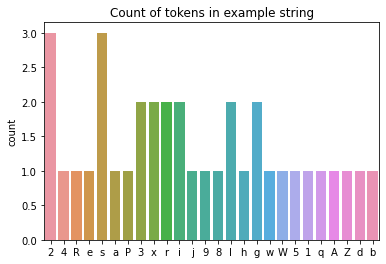

In [5]:
import seaborn as sns

ax = sns.countplot(tokenlist)
ax.set_title('Count of tokens in example string')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of tokens in example sentence')

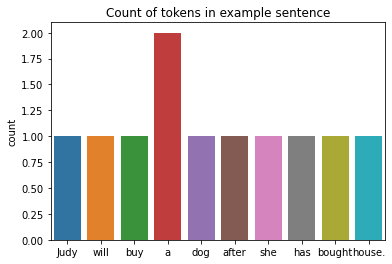

In [6]:
ax = sns.countplot(wordtokens)
ax.set_title('Count of tokens in example sentence')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of spacy tokenized example')

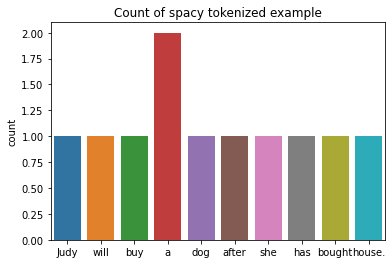

In [7]:
ax = sns.countplot(spacytokens)
ax.set_title('Count of spacy tokenized example')

A simple count of both token lists shows that the text needs to be normalized and trimmed for statistical analysis. The  built in spacy function does not normalize, stem, or lemmatize their tokens.

#Removing Stop Words

Stop words are words that are frequently used (and we want to stop from including them). Removing common words in our corpus will make later predictions more accurate. 

Common words removed are articles (the), adverbs (really, almost), conjunctions (and/or) and pronouns (he/she)

In [20]:
#spacy has a built-in list of stop words
import spacy
import en_core_web_sm #cannot get large to work on colab
nlp = en_core_web_sm.load()
stopWords = list(nlp.Defaults.stop_words)
print('Total number of Stop Words', len(stopWords))
print(stopWords)

Total number of Stop Words 326
['anyway', 'somewhere', 'alone', 'to', 'about', 'among', 'our', 'using', 'without', 'across', 'ever', 'very', 'thereby', 'who', 'everywhere', 'ca', 'thereafter', 'front', 'except', 'now', 'anyone', 'empty', 'ten', 'did', 'for', 'its', 'back', 'they', 'where', 'amongst', 'every', 'was', 'whither', 'part', 'here', 'had', 'besides', 'n’t', 'this', 'own', 'whereas', 'hers', 'herself', 'but', 'toward', 'an', 'above', 'whenever', 'something', 'while', 'put', 'hundred', 'various', 'well', 'twenty', 'eleven', 'such', 'has', 'mostly', 'really', 'thereupon', 'ours', 'other', 'on', 'latter', 'never', 'yourself', 'could', 'take', 'only', 'do', 'nevertheless', 'when', 'many', 'everything', 'my', 'although', 'i', 'six', 'whence', 'whoever', 'less', '’m', 'elsewhere', 'sometimes', 'beforehand', 'into', 'became', 'become', 'beyond', 'does', 'namely', 'whole', '’ve', 'out', 'move', 'already', 'show', '’re', 'always', 'towards', 'go', 'around', 'name', 'if', 'therefore', '

In [36]:
#use spacy's built-in stop-words to clean our list of tokens
# print(example_sentence)
stop_tokens = nlp(example_sentence)

new_tokens = []

for t in stop_tokens:
  if (t.is_stop == False) & (t.is_punct == False):
    new_tokens.append(t.text.lower()) #lowercase here to nomalize output

for tok in new_tokens:
  print(tok)


judy
buy
dog
bought
house


# Lemmatization


In [42]:
#nlp = spacy.load('en_core_web_sm')
lem_text = nlp(example_sentence)
for token in lem_text:
  print(token.text, ' ----> ', token.lemma_)


Judy  ---->  Judy
will  ---->  will
buy  ---->  buy
a  ---->  a
dog  ---->  dog
after  ---->  after
she  ---->  -PRON-
has  ---->  have
bought  ---->  buy
a  ---->  a
house  ---->  house
.  ---->  .


# Text Vectorization
